## Importing

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import dill
import datetime


## Datasets Preparation

In [3]:
def datasets_preparation():

    ds_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_grid_T.nc')

    ds_bio_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_'  + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_biol_T.nc')

    ds = xr.open_dataset (ds_name)
    ds_bio = xr. open_dataset (ds_bio_name)

    date = pd.DatetimeIndex(ds['time_counter'].values)

    temp_i1 = ((ds.votemper.where(mask==1)[0,0:15] * ds.e3t.where(mask==1)
    [0,0:15]).sum('deptht', skipna = True, min_count = 15) / mesh.gdepw_0[0,15]).mean().values

    temp_i2 = ((ds.votemper.where(mask==1)[0,15:27] * ds.e3t.where(mask==1)
    [0,15:27]).sum('deptht', skipna = True, min_count = 12) / (mesh.gdepw_0
    [0,27] - mesh.gdepw_0[0,14])).mean().values

    saline_i1 = ((ds.vosaline.where(mask==1)[0,0:15] * ds.e3t.where(mask==1)
    [0,0:15]).sum('deptht', skipna = True, min_count = 15) / mesh.gdepw_0[0,15]).mean().values

    saline_i2 = ((ds.vosaline.where(mask==1)[0,15:27] * ds.e3t.where(mask==1)
    [0,15:27]).sum('deptht', skipna = True, min_count = 12) / (mesh.gdepw_0
    [0,27] - mesh.gdepw_0[0,14])).mean().values

    sil_i = ((ds_bio.silicon.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    nitr_i = ((ds_bio.nitrate.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    ammo_i = ((ds_bio.ammonium.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    diat_i = ((ds_bio.diatoms.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    flag_i = ((ds_bio.flagellates.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    micro_i = ((ds_bio.microzooplankton.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    meso_i = ((ds_bio.mesozooplankton.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
    [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]).mean().values

    return (date, temp_i1, temp_i2, saline_i1, saline_i2, sil_i, nitr_i, ammo_i, diat_i,  flag_i, micro_i, meso_i)


## Plotting

In [4]:
def plotting(variable,year_variable,title,y_label):
    
    fig, ax = plt.subplots()
    scatter= ax.scatter(dates_new,variable, marker='.', c=pd.DatetimeIndex(dates_new).month)
    plt.ylabel(y_label)
    ax.legend(handles=scatter.legend_elements()[0], labels=['February','March','April'])
    ax.plot(years2,year_variable,color='red',marker='*')
    fig.suptitle('Daily Mean ' + title + ' (15 Feb - 30 Apr)')
    fig.show()
    

## Main Body

01apr07
01apr08
01apr09
01apr10
01apr11
01apr12
01apr13
01apr14
01apr15
01apr16
01apr17
01apr18
01apr19
01apr20
01apr21
01apr22
01apr23
01mar07
01mar08
01mar09
01mar10
01mar11
01mar12
01mar13
01mar14
01mar15
01mar16
01mar17
01mar18
01mar19
01mar20
01mar21
01mar22
01mar23
02apr07
02apr08
02apr09
02apr10
02apr11
02apr12
02apr13
02apr14
02apr15
02apr16
02apr17
02apr18
02apr19
02apr20
02apr21
02apr22
02apr23
02mar07
02mar08
02mar09
02mar10
02mar11
02mar12
02mar13
02mar14
02mar15
02mar16
02mar17
02mar18
02mar19
02mar20
02mar21
02mar22
02mar23
03apr07
03apr08
03apr09
03apr10
03apr11
03apr12
03apr13
03apr14
03apr15
03apr16
03apr17
03apr18
03apr19
03apr20
03apr21
03apr22
03apr23
03mar07
03mar08
03mar09
03mar10
03mar11
03mar12
03mar13
03mar14
03mar15
03mar16
03mar17
03mar18
03mar19
03mar20
03mar21
03mar22
03mar23
04apr07
04apr08
04apr09
04apr10
04apr11
04apr12
04apr13
04apr14
04apr15
04apr16
04apr17
04apr18
04apr19
04apr20
04apr21
04apr22
04apr23
04mar07
04mar08
04mar09
04mar10
04mar11
04mar12


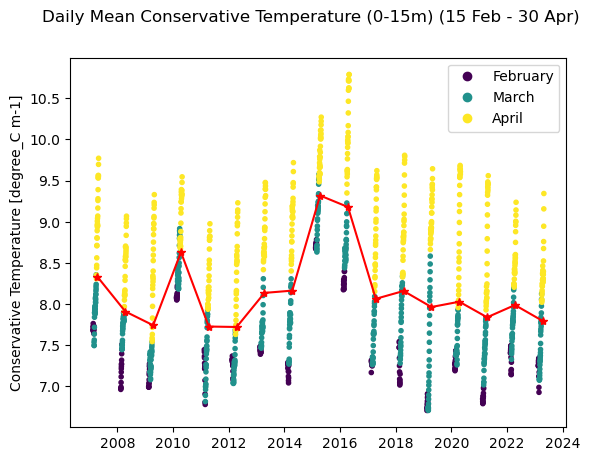

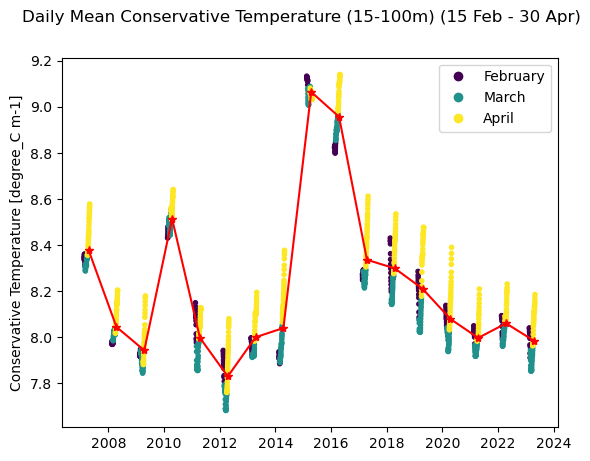

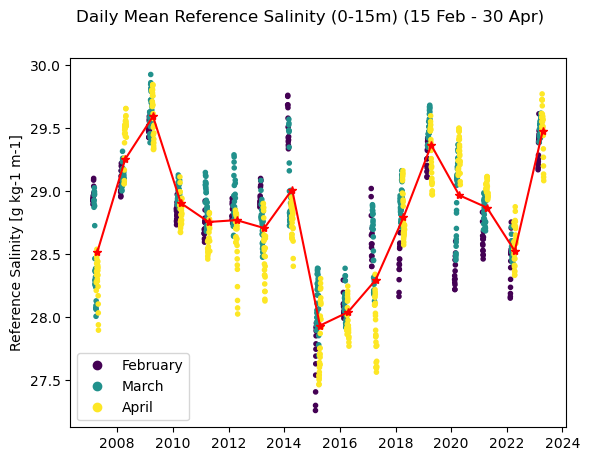

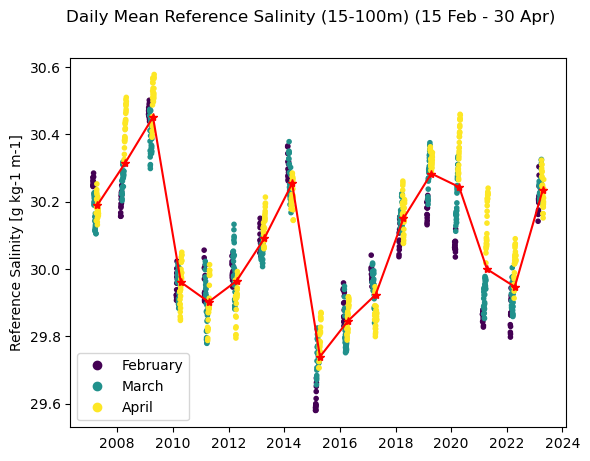

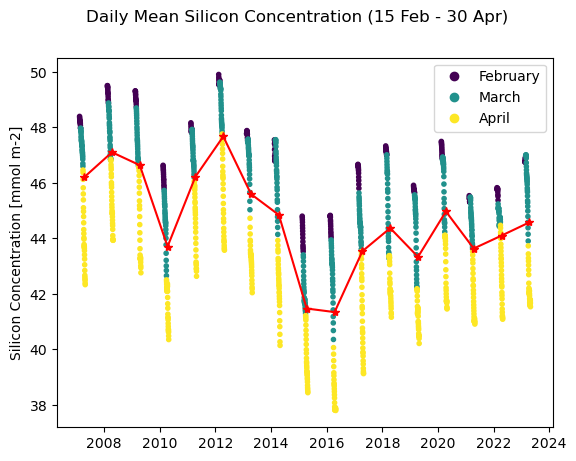

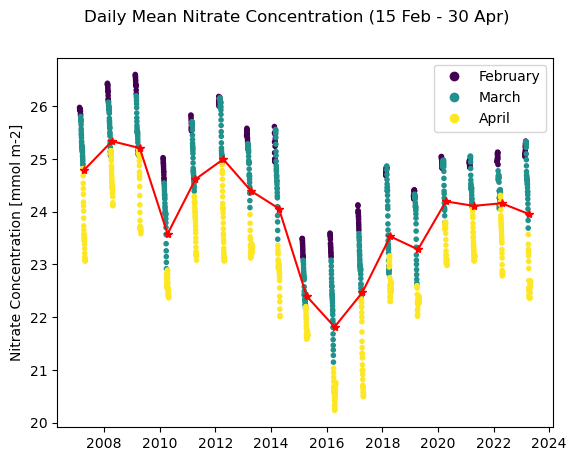

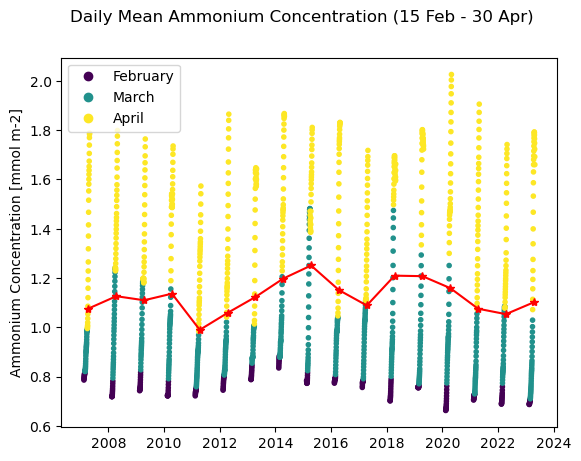

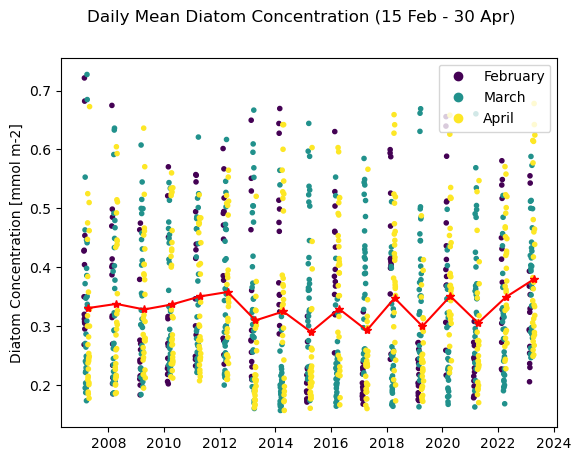

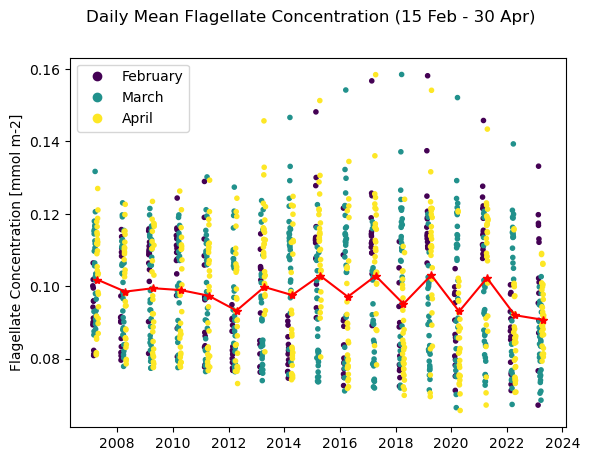

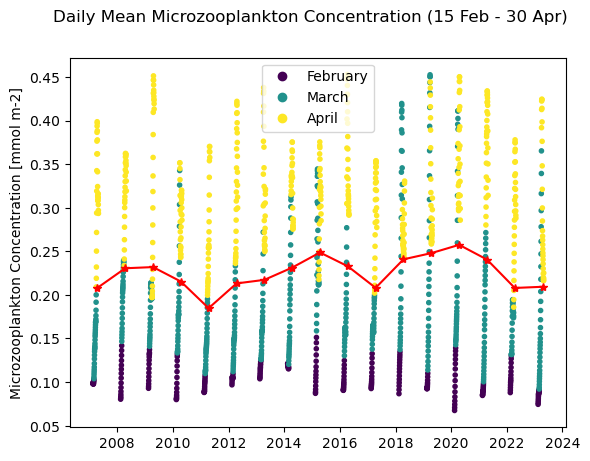

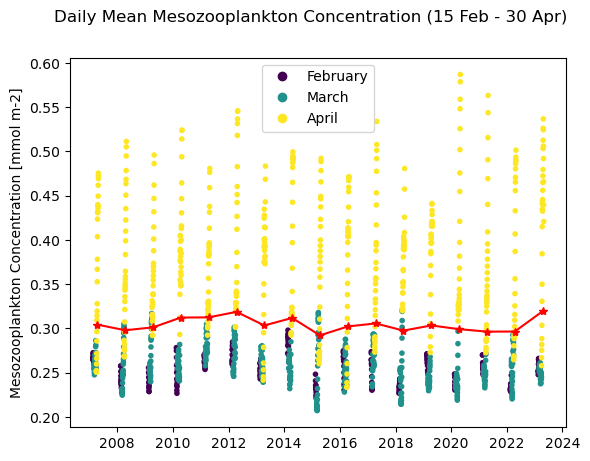

In [5]:
dict_month = {'jan': '01',
         'feb': '02',
         'mar': '03',
         'apr': '04',
         'may': '05',
         'jun': '06',
         'jul': '07',
         'aug': '08',
         'sep': '09',
         'oct': '10',
         'nov': '11',
         'dec': '12'}

path = os.listdir('/results2/SalishSea/nowcast-green.202111/')

folders = [x for x in path if (x[2:5]=='mar' or x[2:5]=='apr') or (x[2:5]=='feb' and x[0:2] > '14')]
folders.sort()

# Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

dates = np.array([])

temp_i1_mean = np.array([])
temp_i2_mean = np.array([])
saline_i1_mean = np.array([])
saline_i2_mean = np.array([])

sil_i_mean = np.array([])
nitr_i_mean = np.array([])
ammo_i_mean = np.array([])

diat_i_mean = np.array([])
flag_i_mean = np.array([])

micro_i_mean = np.array([])
meso_i_mean = np.array([])

for i in folders:

    date, temp_i1, temp_i2, saline_i1, saline_i2, sil_i, nitr_i, ammo_i, diat_i, flag_i, micro_i, meso_i = datasets_preparation()

    dates = np.append(dates,date.date)

    temp_i1_mean = np.append(temp_i1_mean,temp_i1)
    temp_i2_mean = np.append(temp_i2_mean,temp_i2)
    saline_i1_mean = np.append(saline_i1_mean,saline_i1)
    saline_i2_mean = np.append(saline_i2_mean,saline_i2)

    sil_i_mean = np.append(sil_i_mean,sil_i)
    nitr_i_mean = np.append(nitr_i_mean,nitr_i)
    ammo_i_mean = np.append(ammo_i_mean,ammo_i)

    diat_i_mean = np.append(diat_i_mean,diat_i)
    flag_i_mean = np.append(flag_i_mean,flag_i)

    micro_i_mean = np.append(micro_i_mean,micro_i)
    meso_i_mean = np.append(meso_i_mean,meso_i)

    print(i)

# Sorting the time-series

dates_new= dates[np.argsort(dates)]

temp_i1_mean = temp_i1_mean[np.argsort(dates)]
temp_i2_mean = temp_i2_mean[np.argsort(dates)]
saline_i1_mean = saline_i1_mean[np.argsort(dates)]
saline_i2_mean = saline_i2_mean[np.argsort(dates)]

sil_i_mean = sil_i_mean[np.argsort(dates)]
nitr_i_mean = nitr_i_mean[np.argsort(dates)]
ammo_i_mean = ammo_i_mean[np.argsort(dates)]

diat_mean = diat_i_mean[np.argsort(dates)]
flag_mean = flag_i_mean[np.argsort(dates)]

micro_i_mean = micro_i_mean[np.argsort(dates)]
meso_i_mean = meso_i_mean[np.argsort(dates)]

# Calculating the monthly means

years2 = []

temp_i1_year = []
temp_i2_year = []
saline_i1_year = []
saline_i2_year = []

sil_i_year = []
nitr_i_year = []
ammo_i_year = []

diat_i_year = []
flag_i_year = []

micro_i_year = []
meso_i_year = []

years = range (2007,2024)

for i in years:
    years2.append(datetime.datetime(i,4,15))

    temp_i1_year.append(temp_i1_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    temp_i2_year.append(temp_i2_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    saline_i1_year.append(saline_i1_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    saline_i2_year.append(saline_i2_mean[pd.DatetimeIndex(dates_new).year==i].mean())

    sil_i_year.append(sil_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    nitr_i_year.append(nitr_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    ammo_i_year.append(ammo_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    
    diat_i_year.append(diat_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    flag_i_year.append(flag_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())

    micro_i_year.append(micro_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())
    meso_i_year.append(meso_i_mean[pd.DatetimeIndex(dates_new).year==i].mean())

# Plotting

plotting(temp_i1_mean, temp_i1_year, 'Conservative Temperature (0-15m)',
'Conservative Temperature [degree_C m-1]')
plotting(temp_i2_mean, temp_i2_year, 'Conservative Temperature (15-100m)', 
'Conservative Temperature [degree_C m-1]')
plotting(saline_i1_mean, saline_i1_year, 'Reference Salinity (0-15m)', 
'Reference Salinity [g kg-1 m-1]')
plotting(saline_i2_mean, saline_i2_year, 'Reference Salinity (15-100m)', 
'Reference Salinity [g kg-1 m-1]')

plotting(sil_i_mean, sil_i_year, 'Silicon Concentration', 
'Silicon Concentration [mmol m-2]')
plotting(nitr_i_mean, nitr_i_year, 'Nitrate Concentration', 
'Nitrate Concentration [mmol m-2]')
plotting(ammo_i_mean, ammo_i_year, 'Ammonium Concentration', 
'Ammonium Concentration [mmol m-2]')

plotting(diat_i_mean, diat_i_year, 'Diatom Concentration', 
'Diatom Concentration [mmol m-2]')
plotting(flag_i_mean, flag_i_year, 'Flagellate Concentration', 
'Flagellate Concentration [mmol m-2]')

plotting(micro_i_mean, micro_i_year, 'Microzooplankton Concentration', 
'Microzooplankton Concentration [mmol m-2]')
plotting(meso_i_mean, meso_i_year, 'Mesozooplankton Concentration', 
'Mesozooplankton Concentration [mmol m-2]')

